In [19]:
import pandas 
from matplotlib import pyplot as plt
import numpy as np

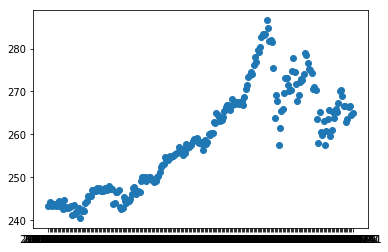

In [20]:
variables = pandas.read_csv('Stock.csv')

price = variables ['Close']
date = variables ['Date']
plt.scatter (date,price) 


/Users/maccs3/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


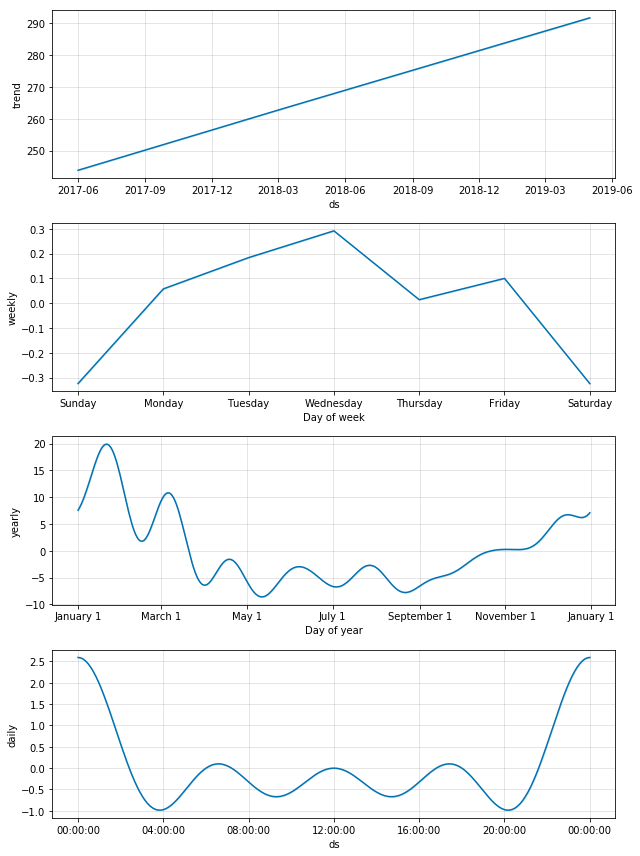

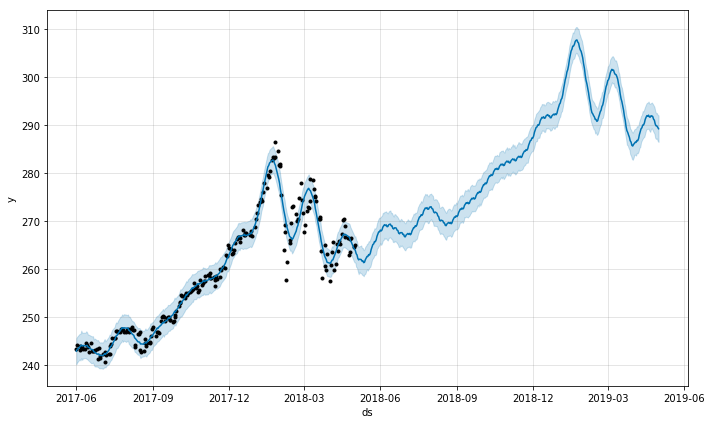

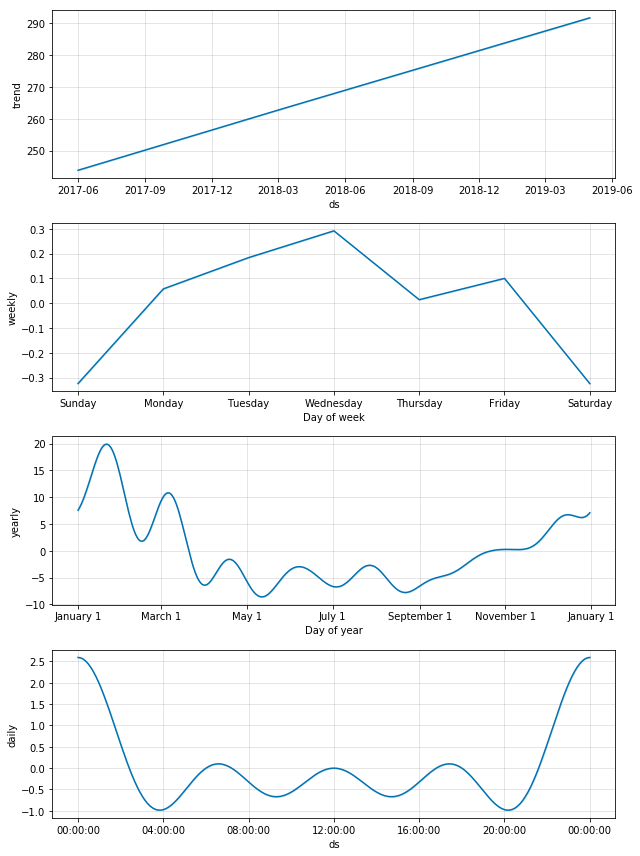

In [32]:
import fbprophet

model = fbprophet.Prophet(yearly_seasonality = True, daily_seasonality = True)
variables['ds'] = date
variables['y'] = price
model.fit(variables)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

model.plot(forecast)
model.plot_components(forecast)

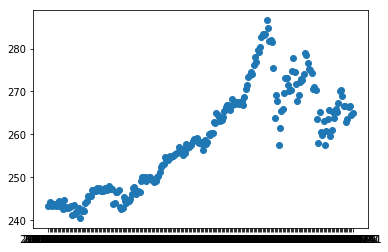

In [25]:
import numpy as np
dates= []
for i in range(0, len(date)):
    dates.append(i)
plt.scatter(date, price)





In [16]:
import numpy as np
dates1 = np.reshape(dates, (-1, 1))

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 10)
X_poly = poly.fit_transform(dates1)
poly.fit(X_poly, price)
lin2 = linear_model.LinearRegression()
lin2.fit(X_poly, price)
regr = linear_model.LinearRegression()
regr.fit(dates1, price)
p = regr.predict(dates1)
q =lin2.predict(poly.fit_transform(dates1))

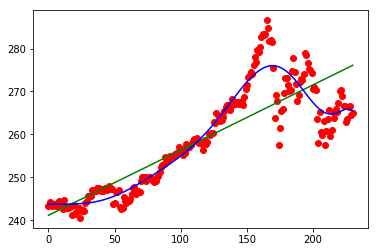

In [17]:

plt.scatter(dates1, price, color = "red")
plt.plot(dates1, p, color ="green")
plt.plot(dates1, q, color ="blue")


In [18]:

regr.score(dates1, p)

1.0